In this notebook, First I have done some exploration on the data using matplotlib and seaborn. Then, I use different classifier models to predict the quality of the wine.

1. Random Forest Classifier

2. LogisticRegression

3. Support Vector Classifier(SVC) 

Then I use cross validation evaluation technique to optimize the model performance.

1. Grid Search CV

2. Cross Validation Score

In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
#Loading dataset


df=pd.read_csv("winequality-red.csv")

In [3]:
#Let's check how the data is distributed
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.duplicated().sum()

240

In [7]:
# removing duplicates
df=df.drop_duplicates()
df.shape

(1359, 12)

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

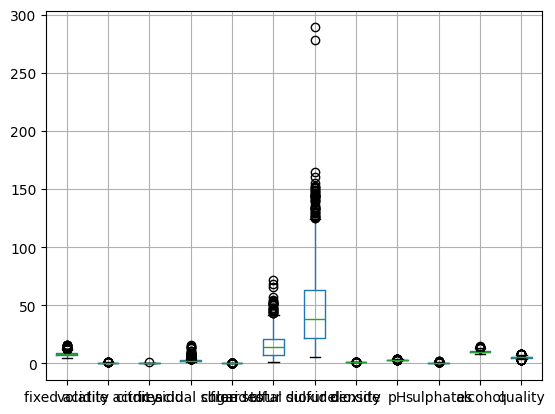

In [9]:
df.boxplot()

In [10]:
#removing outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.524431          0.932000     1.393258        0.461157   0.245623   
1          0.294063          1.915800     1.393258        0.056665   0.200094   
2          0.294063          1.259934     1.188617        0.165259   0.078535   
3          1.664067          1.363534     1.471711        0.461157   0.265883   
5          0.524431          0.713378     1.393258        0.535132   0.265883   
...             ...               ...          ...             ...        ...   
1593       0.869983          0.494756     0.983977        0.461157   0.407702   
1594       1.215536          0.385444     0.983977        0.387183   0.038015   
1595       1.388312          0.112167     0.881656        0.239233   0.529261   
1597       1.388312          0.631395     0.779336        0.387183   0.265883   
1598       1.330720          1.199567     1.011270        0.796410   0.427962   

      free sulfur dioxide  

In [11]:
threshold_z = 3
outlier_indices = np.where(z > threshold_z)[0]

# Create a boolean mask to identify outliers
outlier_mask = np.full(len(df), False)
outlier_mask[outlier_indices] = True

# Use the mask to filter out outliers from the DataFrame
no_outliers = df[~outlier_mask]

print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (1359, 12)
DataFrame Shape after Removing Outliers: (1232, 12)


In [12]:
df=no_outliers
df.shape

(1232, 12)


Let's do some plotting to know how the data columns are distributed in the dataset

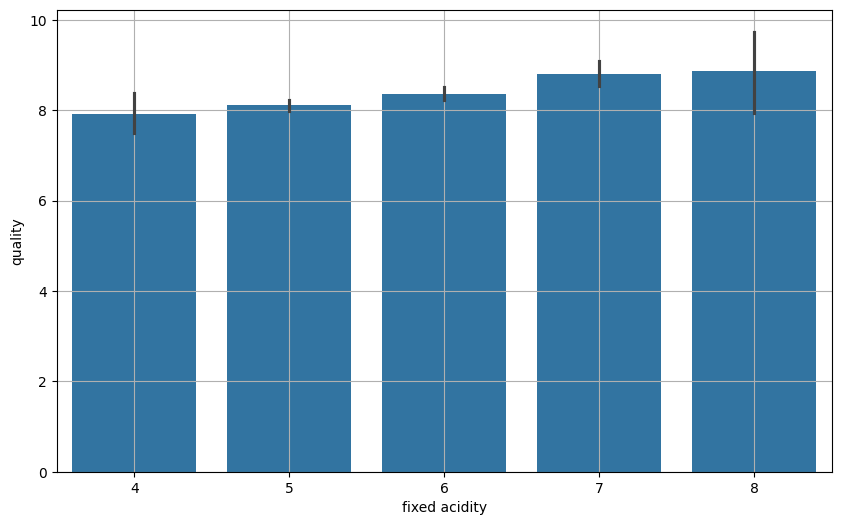

In [13]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity',data=df)
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.grid(True)

plt.show()

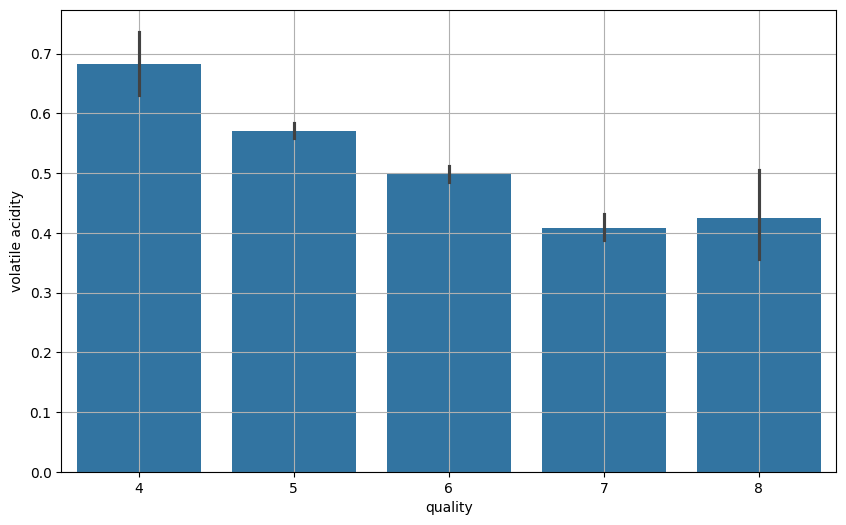

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity',data=df)
plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.grid(True)

plt.show()

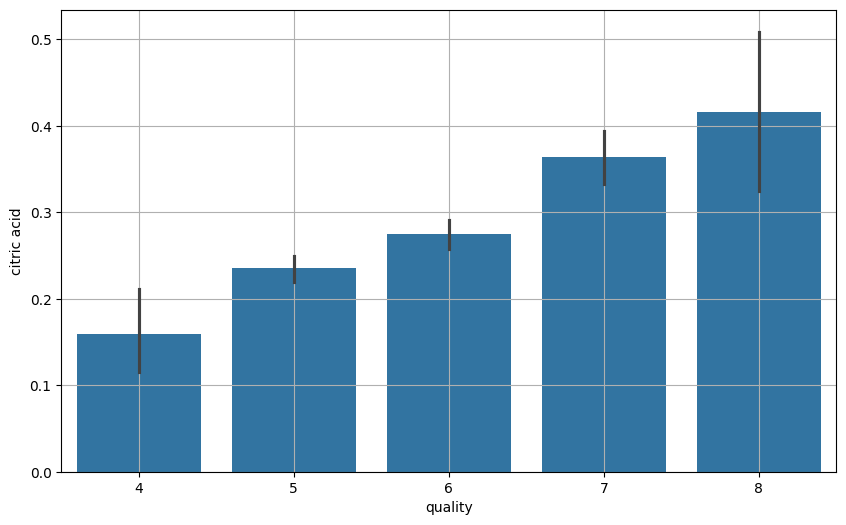

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid',data=df)
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.grid(True)

plt.show()

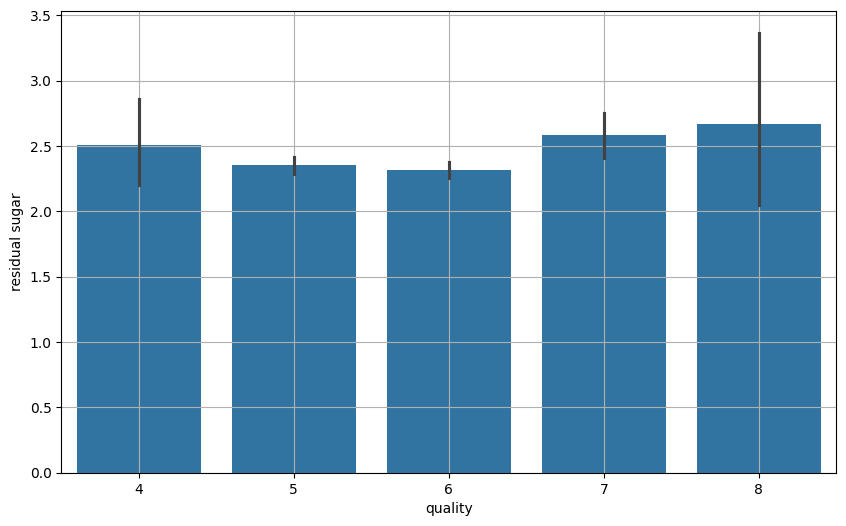

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar',data=df)
plt.xlabel('quality')
plt.ylabel('residual sugar')
plt.grid(True)

plt.show()

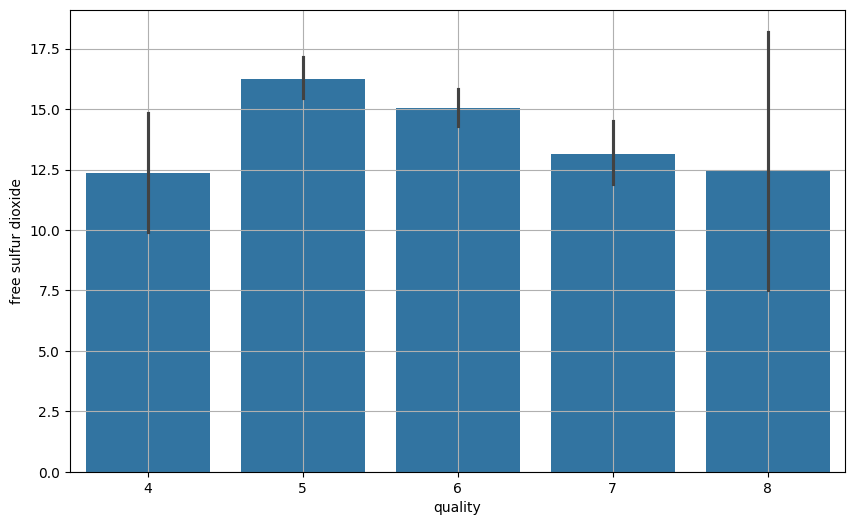

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide',data=df)
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')
plt.grid(True)

plt.show()

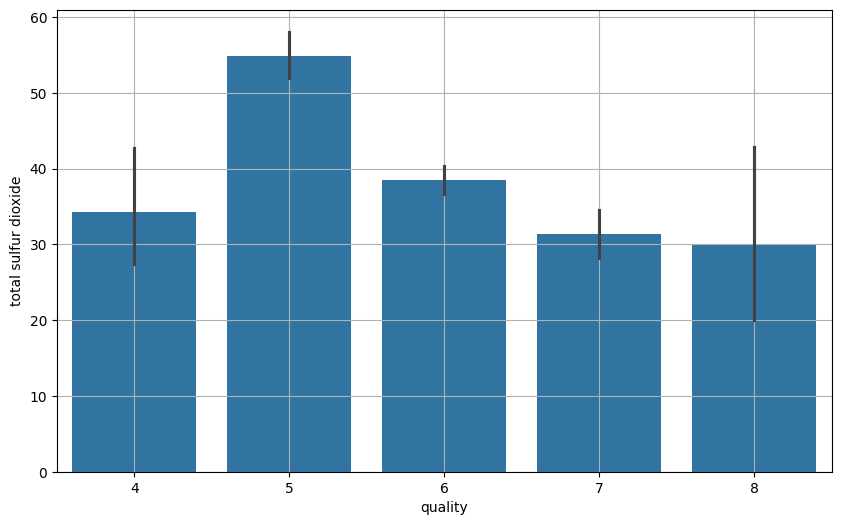

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide',data=df)
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')
plt.grid(True)

plt.show()

In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

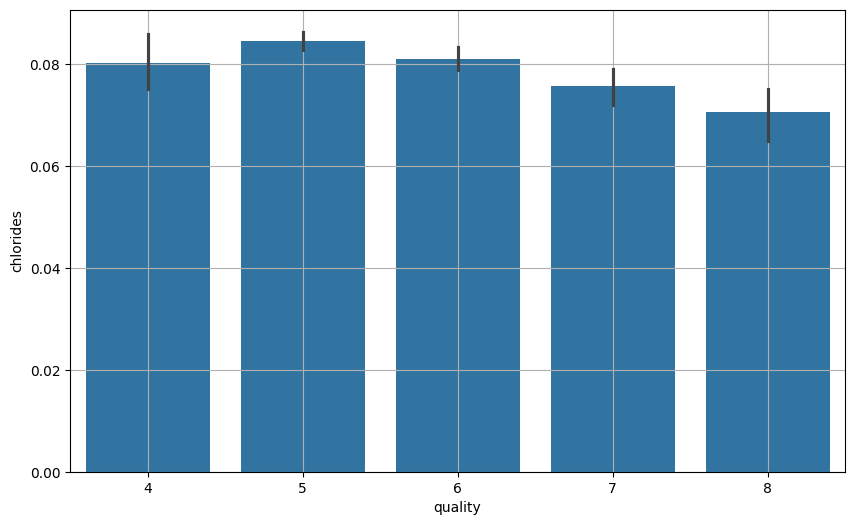

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides',data=df)
plt.xlabel('quality')
plt.ylabel('chlorides')
plt.grid(True)

plt.show()

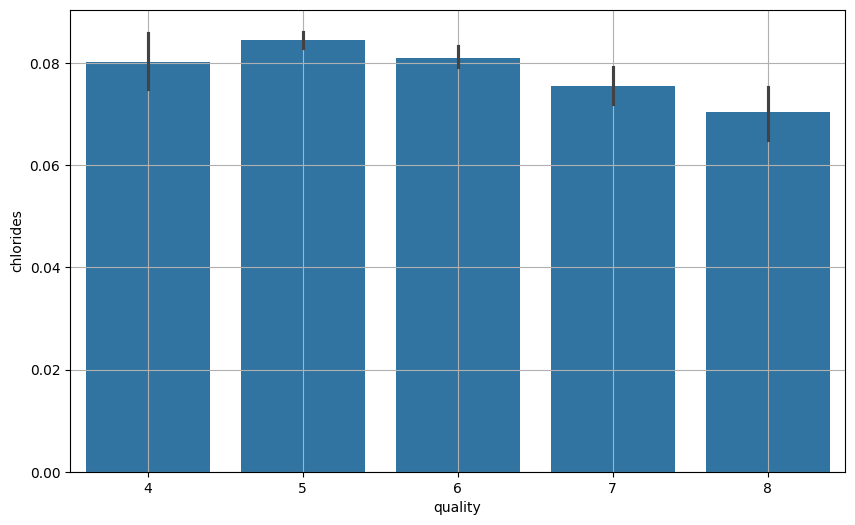

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides',data=df)
plt.xlabel('quality')
plt.ylabel('chlorides')
plt.grid(True)

plt.show()

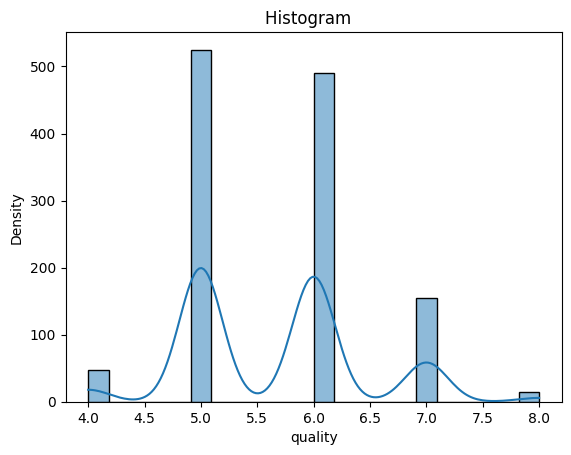

In [22]:
sns.histplot(df['quality'], kde=True)  # KDE adds a kernel density estimation line
plt.title('Histogram  ')

plt.ylabel('Density')
plt.show()

In [23]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.295842,0.693249,0.184156,0.155797,-0.131519,-0.091455,0.658659,-0.709816,0.205601,-0.017930,0.142221
volatile acidity,-0.295842,1.000000,-0.586314,0.034444,0.081953,0.005716,0.114398,0.004609,0.262100,-0.338508,-0.217095,-0.359736
citric acid,0.693249,-0.586314,1.000000,0.175117,0.094445,-0.061288,0.012752,0.358471,-0.526370,0.313997,0.166913,0.245672
residual sugar,0.184156,0.034444,0.175117,1.000000,0.104471,-0.004159,0.075256,0.330967,-0.079046,0.050731,0.161520,0.052219
chlorides,0.155797,0.081953,0.094445,0.104471,1.000000,-0.049994,0.064625,0.300775,-0.181016,0.041176,-0.206772,-0.119767
free sulfur dioxide,-0.131519,0.005716,-0.061288,-0.004159,-0.049994,1.000000,0.654184,-0.024826,0.084844,0.046576,-0.092870,-0.076318
total sulfur dioxide,-0.091455,0.114398,0.012752,0.075256,0.064625,0.654184,1.000000,0.125982,-0.029544,-0.045177,-0.281309,-0.239612
density,0.658659,0.004609,0.358471,0.330967,0.300775,-0.024826,0.125982,1.000000,-0.322901,0.122533,-0.482930,-0.179034
pH,-0.709816,0.262100,-0.526370,-0.079046,-0.181016,0.084844,-0.029544,-0.322901,1.000000,-0.053683,0.139864,-0.078959
sulphates,0.205601,-0.338508,0.313997,0.050731,0.041176,0.046576,-0.045177,0.122533,-0.053683,1.000000,0.249283,0.385837


In [24]:
import pandas as pd
from scipy.stats import pearsonr


alpha = 0.05

# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['volatile acidity'], df['quality'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between volatile acidity and quality.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between volatile acidity and quality.")

Reject the null hypothesis. There is a significant correlation between volatile acidity and quality.


In [25]:
import pandas as pd
from scipy.stats import pearsonr


alpha = 0.05

# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['fixed acidity'], df['quality'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between volatile acidity and quality.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between volatile acidity and quality.")

Reject the null hypothesis. There is a significant correlation between volatile acidity and quality.


In [26]:
import pandas as pd
from scipy.stats import pearsonr


alpha = 0.05

# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['citric acid'], df['quality'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between volatile acidity and quality.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between volatile acidity and quality.")

Reject the null hypothesis. There is a significant correlation between volatile acidity and quality.


In [27]:
import pandas as pd
from scipy.stats import pearsonr


alpha = 0.05

# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['residual sugar'], df['quality'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between volatile acidity and quality.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between volatile acidity and quality.")

Fail to reject the null hypothesis. There is no significant correlation between volatile acidity and quality.


In [28]:
import pandas as pd
from scipy.stats import pearsonr


alpha = 0.05

# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['chlorides'], df['quality'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between volatile acidity and quality.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between volatile acidity and quality.")

Reject the null hypothesis. There is a significant correlation between volatile acidity and quality.


In [29]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [30]:
import pandas as pd
from scipy.stats import pearsonr


alpha = 0.05

# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['free sulfur dioxide'], df['quality'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between volatile acidity and quality.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between volatile acidity and quality.")

Reject the null hypothesis. There is a significant correlation between volatile acidity and quality.


In [31]:
import pandas as pd
from scipy.stats import pearsonr


alpha = 0.05

# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['total sulfur dioxide'], df['quality'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between total sulfur dioxide and quality.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between total sulfur dioxide and quality.")

Reject the null hypothesis. There is a significant correlation between total sulfur dioxide and quality.


In [32]:
import pandas as pd
from scipy.stats import pearsonr


alpha = 0.05

# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['density'], df['quality'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between density and quality.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between density and quality.")

Reject the null hypothesis. There is a significant correlation between density and quality.


In [33]:
import pandas as pd
from scipy.stats import pearsonr


alpha = 0.05

# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['pH'], df['quality'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between pH and quality.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between pH and quality.")

Reject the null hypothesis. There is a significant correlation between pH and quality.


In [34]:
import pandas as pd
from scipy.stats import pearsonr


alpha = 0.05

# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['sulphates'], df['quality'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between sulphates and quality.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between sulphates and quality.")

Reject the null hypothesis. There is a significant correlation between sulphates and quality.


In [35]:
import pandas as pd
from scipy.stats import pearsonr


alpha = 0.05

# Perform the hypothesis test
correlation_coefficient, p_value = pearsonr(df['alcohol'], df['quality'])

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between alcohol and quality.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between alcohol and quality.")

Reject the null hypothesis. There is a significant correlation between alcohol and quality.


In [36]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

 The null hypothesis (H0)
states that there is no correlation between 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol' and quality, while the alternative hypothesis (H1)
suggests that there is a correlation.

Based on the analysis, the null hypothesis was rejected for all observations in the dataset. This indicates strong evidence of a statistically significant correlation between 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol' and quality across all samples.

Therefore, we conclude that there is a significant correlation between  'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol' and quality in the dataset.



###Preprocessing Data for performing Machine learning algorithms


In [37]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the qualitybins = (2, 6.5, 8)
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

from sklearn.preprocessing import LabelEncoder

label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

quality
0    1063
1     169
Name: count, dtype: int64

<Axes: ylabel='count'>

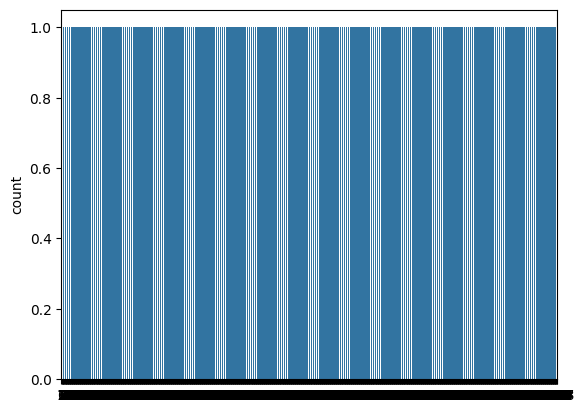

In [38]:
sns.countplot(df['quality'])

In [39]:
#Applying Standard scaling to get optimized result
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()

In [40]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop(['quality'], axis =1)
y = df['quality']

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=.3)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [42]:
###Support Vector Classifier
from sklearn.svm import SVC
svc=SVC(random_state=1) 
svc.fit(X_train,y_train)

SVC(random_state=1)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_pred=svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       321
           1       0.68      0.27      0.38        49

    accuracy                           0.89       370
   macro avg       0.79      0.62      0.66       370
weighted avg       0.87      0.89      0.86       370



In [44]:
###RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:

y_pred1=rf.predict(X_test)

print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.90      0.97      0.94       321
           1       0.64      0.33      0.43        49

    accuracy                           0.89       370
   macro avg       0.77      0.65      0.68       370
weighted avg       0.87      0.89      0.87       370



In [46]:
###LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression ()
lr.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred2=lr.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       321
           1       0.53      0.37      0.43        49

    accuracy                           0.87       370
   macro avg       0.72      0.66      0.68       370
weighted avg       0.86      0.87      0.86       370



In [48]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=1),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [49]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [53]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1, gamma =  0.1, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       321
           1       0.68      0.27      0.38        49

    accuracy                           0.89       370
   macro avg       0.79      0.62      0.66       370
weighted avg       0.87      0.89      0.86       370



In [54]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.8863405506549051

Random forest accuracy increases from 87% to 88 % using cross validation score